<div style="border:2px solid black; padding:20px">

## Introduction to TERN Ecosystem Processes Datasets

The Terrestrial Ecosystem Research Network (TERN) collects and provides a wide array of data that help researchers, policymakers, and conservationists understand Australia's diverse ecosystems. One of these datasets focuses on ecosystem processes, specifically detailing parameters like tree diameter, height, and importantly, above-ground biomass calculations. 

Above-ground biomass (AGB) represents the total amount of living organic material above the soil layer. It includes stems, branches, bark, seeds, and foliage. Understanding AGB is crucial for various ecological and environmental studies, particularly those related to carbon storage, forest productivity, and habitat quality.

In this tutorial, we will guide you through the process of retrieving data from TERN's ecosystem processes datasets, specifically focusing on the above-ground biomass measurements. We will delve deep into data from three distinct sites: Daintree Rainforest (Cow Bay) and Samford. By the end of this guide, you will gain insights into biomass measurements, understand the significance of these measurements, and be proficient in visualizing and analyzing this data in Python.

---

### Daintree Rainforest, Cow Bay

- **Description**: The dataset from Daintree Rainforest, Cow Bay, provides stem diameter, height measurements, and above-ground living biomass calculations for an Australian tropical rainforest. Both diameter and height measurements for stems ≥10cm diameter at breast height were sampled within a 1 ha plot in 2012 and 2018.
- **Purpose**: This data is crucial for mapping and monitoring changes in plant growth, carbon storage, and terrestrial energy fluxes.
- **Lineage**: The 1 ha plot was divided into 25 subplots (20 x 20 m). Each individual stem ≥ 10 cm diameter at breast height was mapped within each subplot. Above-ground biomass was calculated using the allometric equation from Chave et al. 2014.


---

### Samford

- **Description**: This dataset offers stem diameter, height measurement, and above-ground living biomass calculations for an open Eucalypt and notophyll vine forest in a 1 ha plot within the Samford Peri-Urban site.
- **Purpose**: As with the other sites, this data is instrumental for understanding changes in plant growth, carbon storage, and terrestrial energy fluxes.
- **Lineage**: All stems ≥ 10 cm diameter at breast height were mapped within each 20 x 20 m subplot. Heights for visible and larger stems were measured using a Nikon laser range finder. Biomass was calculated using the allometric equation from Chave et al. 2014.

</div>


### Data Loading and Preliminary Examination

Before embarking on any form of data analysis, the foundational step involves loading our dataset and undertaking a preliminary examination of its constituents. This cursory glance affords us a window into the dataset's structure, the types of variables encapsulated within, and the overall data organization.
In this tutorial, we won't be downloading the dataset manually. Instead, we'll be directly retrieving it through TERN's API. This approach ensures we always have access to the most up-to-date data available. Once we retrieve the data, we'll take a preliminary glance to understand its structure.

---


In [10]:
import http.client
import json
import pandas as pd
import io

conn = http.client.HTTPSConnection("ecoplots-test.tern.org.au")

payload = json.dumps({
    "query": {
        "dataset": ["http://linked.data.gov.au/dataset/tern-ecosystem-processes"],
        "observed_property": ["http://linked.data.gov.au/def/tern-cv/c3d26c6f-91b7-4627-91e6-2147fa44ad03"],
        "site_id": [
            "https://w3id.org/tern/resources/5febb758-e33e-43dd-985e-11802fd7ab42",
            "https://w3id.org/tern/resources/48396239-7335-422b-9f13-a31054306d71"
        ],
        "feature_type": ["http://linked.data.gov.au/def/tern-cv/60d7edf8-98c6-43e9-841c-e176c334d270"]
    }
})

headers = {
    'X-Api-Key': 'api_key',  
    'Content-Type': 'application/json'
}

conn.request("POST", "/api/v1.0/data/tern-ecosystem-processes?dformat=csv", payload, headers)
res = conn.getresponse()
data_api = res.read().decode("utf-8")

# Converting the retrieved data into a DataFrame
data = pd.read_csv(io.StringIO(data_api))


### Glimpse into the Data

Having successfully retrieved our dataset via the API, it's now time to inspect the initial records. This cursory examination is essential as it offers insights into the kind of data we're dealing with, the various attributes encapsulated within, and their presentation format.

---


In [11]:
# Display the first few rows of the dataset
data.head()


,datasetTitle,projectTitle,siteName,parentSiteName,latitude_Degree,longitude_Degree,topParentSiteName,siteVisitName,siteVisitStartDate,siteVisitEndDate,featureType,featureId,parentFeatureId,scientificName,positionXCoordinate_Metre,plantId,positionYCoordinate_Metre,aboveGroundBiomass_kilogram,aboveGroundBiomassResultTime,aboveGroundBiomassMethod
0,TERN Ecosystem Processes,Biomass,11,"Daintree Rainforest, Cow Bay, core1ha",-16.2377,145.429,"Daintree Rainforest, Cow Bay",20120607,2012-06-07T00:00:00,NaN,plant individual,http://linked.data.gov.au/dataset/tern-ecosyst...,http://linked.data.gov.au/dataset/tern-ecosyst...,Dysoxylum pettigrewianum,2.0,1,3.0,3442.995022,2012-06-07T00:00:00,http://linked.data.gov.au/def/tern-cv/dcf170fe...
1,TERN Ecosystem Processes,Biomass,11,"Daintree Rainforest, Cow Bay, core1ha",-16.2377,145.429,"Daintree Rainforest, Cow Bay",20120607,2012-06-07T00:00:00,NaN,plant individual,http://linked.data.gov.au/dataset/tern-ecosyst...,http://linked.data.gov.au/dataset/tern-ecosyst...,Normanbya normanbyi,15.5,10,9.0,266.658070,2012-06-07T00:00:00,http://linked.data.gov.au/def/tern-cv/dcf170fe...
2,TERN Ecosystem Processes,Biomass,14,"Daintree Rainforest, Cow Bay, core1ha",-16.2377,145.429,"Daintree Rainforest, Cow Bay",20120607,2012-06-07T00:00:00,NaN,plant individual,http://linked.data.gov.au/dataset/tern-ecosyst...,http://linked.data.gov.au/dataset/tern-ecosyst...,Castanospermum australe,13.0,101,2.0,1127.924134,2012-06-07T00:00:00,http://linked.data.gov.au/def/tern-cv/dcf170fe...
3,TERN Ecosystem Processes,Biomass,14,"Daintree Rainforest, Cow Bay, core1ha",-16.2377,145.429,"Daintree Rainforest, Cow Bay",20120607,2012-06-07T00:00:00,NaN,plant individual,http://linked.data.gov.au/dataset/tern-ecosyst...,http://linked.data.gov.au/dataset/tern-ecosyst...,Cryptocarya angulata,12.0,102,23.0,1667.607317,2012-06-07T00:00:00,http://linked.data.gov.au/def/tern-cv/dcf170fe...
4,TERN Ecosystem Processes,Biomass,14,"Daintree Rainforest, Cow Bay, core1ha",-16.2377,145.429,"Daintree Rainforest, Cow Bay",20120607,2012-06-07T00:00:00,NaN,plant individual,http://linked.data.gov.au/dataset/tern-ecosyst...,http://linked.data.gov.au/dataset/tern-ecosyst...,Cerbera floribunda,14.0,103,22.0,983.877888,2012-06-07T00:00:00,http://linked.data.gov.au/def/tern-cv/dcf170fe...


 Understanding the Dataset Structure
Before diving deep into data analysis, it's essential to grasp the structure of our dataset. Knowing the various columns, the type of data they encompass, and any potential missing values is crucial. This insight will guide our subsequent steps, be it data cleaning, visualization, or modeling.

Let's first get a concise summary of the dataset. This will provide us with information like column names, non-null counts, and data types for each column. It's a pivotal step to detect if any columns have missing data and to understand the nature of data we are dealing with (e.g., numerical, categorical).

In [12]:
# Display the basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   datasetTitle                  2581 non-null   object 
 1   projectTitle                  2581 non-null   object 
 2   siteName                      2581 non-null   object 
 3   parentSiteName                2581 non-null   object 
 4   latitude_Degree               2581 non-null   float64
 5   longitude_Degree              2581 non-null   float64
 6   topParentSiteName             2581 non-null   object 
 7   siteVisitName                 2581 non-null   int64  
 8   siteVisitStartDate            2581 non-null   object 
 9   siteVisitEndDate              0 non-null      float64
 10  featureType                   2581 non-null   object 
 11  featureId                     2581 non-null   object 
 12  parentFeatureId               2581 non-null   object 
 13  sci

### Handling Missing Data
In datasets, especially ones sourced from real-world observations, it's common to encounter missing values. These can arise due to various reasons: from errors in data collection to the absence of information for specific entries.

Ignoring missing data can be detrimental. Depending on the analysis or modeling techniques used, missing values can result in errors or biased results. Hence, it's essential to identify and decide how to address them. Common strategies include:

**Deleting**: Removing the rows with missing values.
**Imputation**: Replacing missing values with statistical measures like mean, median, mode, etc.
**Prediction**: Using algorithms to predict and replace missing values.
Let's first identify columns that have missing values and then determine the best approach to handle them.

In [13]:
# Identifying columns with missing values
missing_values = data.isnull().sum()

# Display columns with missing values and their count
missing_columns = missing_values[missing_values > 0]
missing_columns


siteVisitEndDate    2581
dtype: int64

### Addressing Missing Values in 'siteVisitEndDate'
We observe that the column siteVisitEndDate has 2,581 missing entries. The decision on how to handle these missing values depends on the nature of the data and the context.

The siteVisitEndDate likely indicates the end date of a site visit or observation. If this value is missing, it could mean a few things:

The observation or visit is still ongoing.
The end date was not recorded due to oversight or error.
The data only records the start date if the observation was for a single day.
Given this context, we have a few options:

**Delete Rows**: If the number of missing values is small and we believe it won't impact our analysis significantly, we can remove these rows. However, given that we have 2,581 missing entries, this might not be the best approach.

**Impute with the Start Date**: If we assume that the observation was for a single day, we can fill the missing end dates with the corresponding start dates.

**Leave as-is**: If we don't anticipate using this column heavily in our analysis, or if missing values won't impact our specific use case, we can choose to leave the values as missing.
For this tutorial, let's adopt the second strategy and impute the missing siteVisitEndDate values with the corresponding start dates. This assumes that any missing end date means the observation or visit was completed on the same day it began.



### Ignoring the siteVisitEndDate Column
In many research scenarios, it might be acceptable to focus solely on the siteVisitStartDate if the exact duration of the visit is not crucial to the analysis. If the primary objective is to understand patterns related to the start of the site visits or if the visits typically span a short, consistent duration, then the end date might not add significant value.

By excluding the siteVisitEndDate column, we can simplify our dataset and streamline the analysis. Let's proceed with this approach.

In [15]:
# Drop the 'siteVisitEndDate' column
data.drop('siteVisitEndDate', axis=1, inplace=True)

# Display the first few rows of the modified dataset to confirm
data.head()


,datasetTitle,projectTitle,siteName,parentSiteName,latitude_Degree,longitude_Degree,topParentSiteName,siteVisitName,siteVisitStartDate,featureType,featureId,parentFeatureId,scientificName,positionXCoordinate_Metre,plantId,positionYCoordinate_Metre,aboveGroundBiomass_kilogram,aboveGroundBiomassResultTime,aboveGroundBiomassMethod
0,TERN Ecosystem Processes,Biomass,11,"Daintree Rainforest, Cow Bay, core1ha",-16.2377,145.429,"Daintree Rainforest, Cow Bay",20120607,2012-06-07T00:00:00,plant individual,http://linked.data.gov.au/dataset/tern-ecosyst...,http://linked.data.gov.au/dataset/tern-ecosyst...,Dysoxylum pettigrewianum,2.0,1,3.0,3442.995022,2012-06-07T00:00:00,http://linked.data.gov.au/def/tern-cv/dcf170fe...
1,TERN Ecosystem Processes,Biomass,11,"Daintree Rainforest, Cow Bay, core1ha",-16.2377,145.429,"Daintree Rainforest, Cow Bay",20120607,2012-06-07T00:00:00,plant individual,http://linked.data.gov.au/dataset/tern-ecosyst...,http://linked.data.gov.au/dataset/tern-ecosyst...,Normanbya normanbyi,15.5,10,9.0,266.658070,2012-06-07T00:00:00,http://linked.data.gov.au/def/tern-cv/dcf170fe...
2,TERN Ecosystem Processes,Biomass,14,"Daintree Rainforest, Cow Bay, core1ha",-16.2377,145.429,"Daintree Rainforest, Cow Bay",20120607,2012-06-07T00:00:00,plant individual,http://linked.data.gov.au/dataset/tern-ecosyst...,http://linked.data.gov.au/dataset/tern-ecosyst...,Castanospermum australe,13.0,101,2.0,1127.924134,2012-06-07T00:00:00,http://linked.data.gov.au/def/tern-cv/dcf170fe...
3,TERN Ecosystem Processes,Biomass,14,"Daintree Rainforest, Cow Bay, core1ha",-16.2377,145.429,"Daintree Rainforest, Cow Bay",20120607,2012-06-07T00:00:00,plant individual,http://linked.data.gov.au/dataset/tern-ecosyst...,http://linked.data.gov.au/dataset/tern-ecosyst...,Cryptocarya angulata,12.0,102,23.0,1667.607317,2012-06-07T00:00:00,http://linked.data.gov.au/def/tern-cv/dcf170fe...
4,TERN Ecosystem Processes,Biomass,14,"Daintree Rainforest, Cow Bay, core1ha",-16.2377,145.429,"Daintree Rainforest, Cow Bay",20120607,2012-06-07T00:00:00,plant individual,http://linked.data.gov.au/dataset/tern-ecosyst...,http://linked.data.gov.au/dataset/tern-ecosyst...,Cerbera floribunda,14.0,103,22.0,983.877888,2012-06-07T00:00:00,http://linked.data.gov.au/def/tern-cv/dcf170fe...


### Initial Data Exploration
With our dataset cleaned and prepared, it's time to delve into the exploratory data analysis (EDA). EDA is a crucial step in the data analysis process, as it allows us to understand the structure, patterns, anomalies, and relationships within the data.

To understand the distribution and central tendencies of the biomass data, we'll examine the summary statistics of the aboveGroundBiomass_kilogram column. This will give us insights into the average biomass, its spread, and other key metrics.

In [17]:
# Selecting columns that are relevant for summary statistics
key_columns = ['aboveGroundBiomass_kilogram']
data[key_columns].describe()


,aboveGroundBiomass_kilogram
count,2581.000000
mean,505.422578
std,1030.367475
min,0.000000
25%,70.942138
50%,160.800000
75%,423.492606
max,11155.224000


### Understanding the Above-Ground Biomass Distribution
The above-ground biomass, measured in kilograms, provides insights into the amount of organic material present above the soil in various plants. This metric can be critical for several research questions, such as estimating carbon storage, understanding vegetation health, and more. Here's a general breakdown of the summary statistics you might observe:

**Count**: This represents the total number of individual plant measurements in the dataset.
**Mean**: This gives an average estimate of the biomass of an individual plant in the dataset.
**Standard Deviation**: A higher standard deviation indicates a wide variance in the biomass values, suggesting a diverse mix of smaller and larger plants.
**Minimum**: The smallest biomass recorded could indicate very young plants or even some measurement errors.
Percentiles (25th, 50th - Median, 75th): These values help understand the distribution spread and where the majority of the data lies.
**Maximum**: The largest biomass recorded can indicate the presence of some very large trees or plants in the dataset.
The exact numbers can vary based on the dataset's updates. However, these statistics provide a framework to understand the distribution of biomass. Visualizing this data can offer more intuitive insights.



### Visualising Above-Ground Biomass Distribution
Understanding the overall distribution of above-ground biomass (AGB) gives us an initial insight into the spread and concentration of biomass values in our dataset. This histogram allows us to discern patterns, possible outliers, and typical ranges of AGB values.

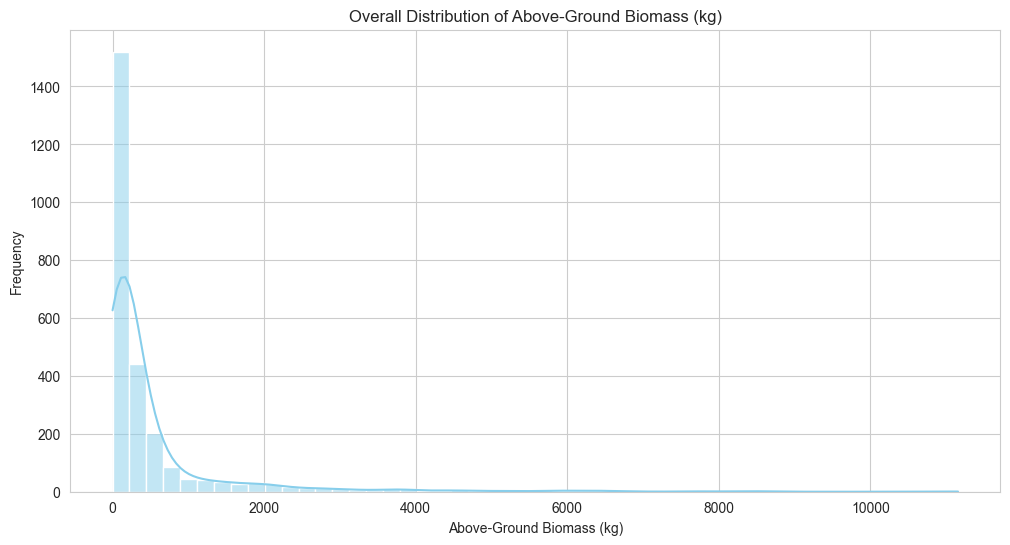

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Overall distribution of Above-Ground Biomass
plt.figure(figsize=(12, 6))
sns.histplot(data['aboveGroundBiomass_kilogram'], bins=50, kde=True, color='skyblue')
plt.title('Overall Distribution of Above-Ground Biomass (kg)')
plt.xlabel('Above-Ground Biomass (kg)')
plt.ylabel('Frequency')
plt.show()


### Comparing Average Above-Ground Biomass Across Specific Sites
To delve deeper into the distribution of above-ground biomass (AGB) across specific sites, we'll visualize the average AGB for each. A bar plot will provide a direct comparison of the mean AGB values for these locations.

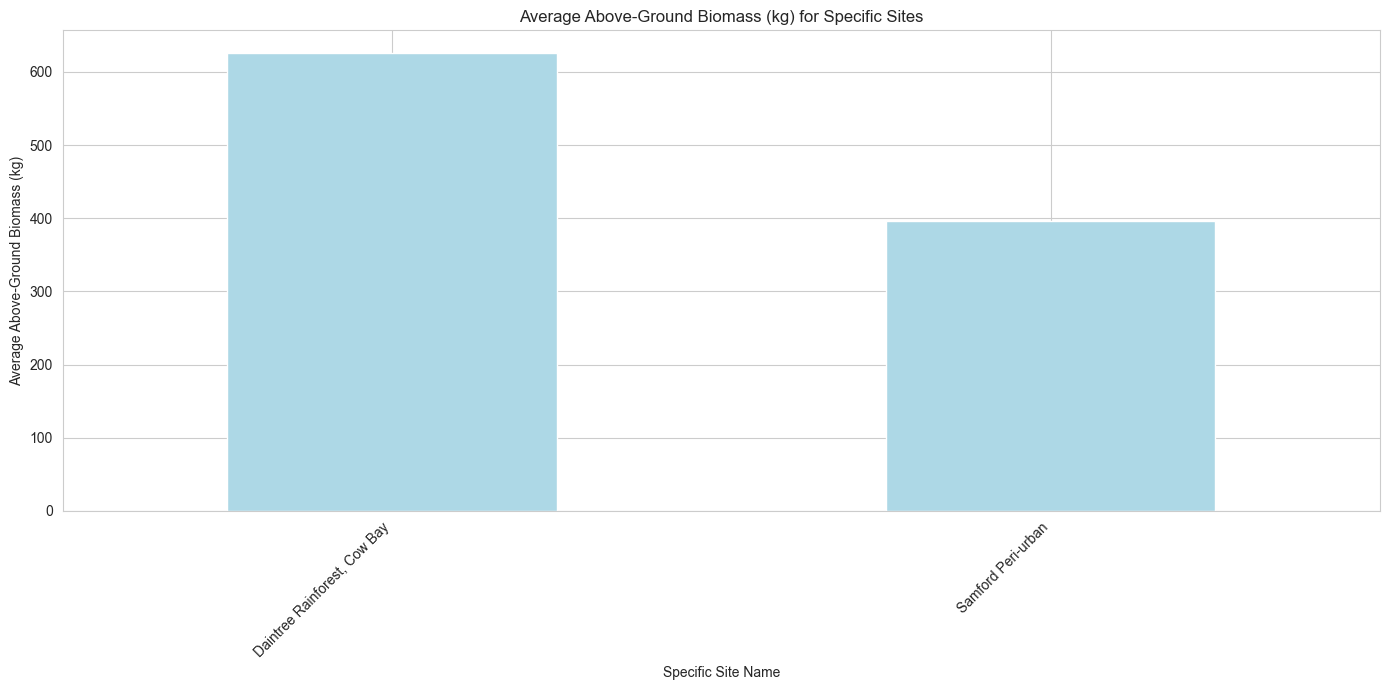

In [21]:
# Average Above-Ground Biomass per specific site
avg_biomass_sites = data.groupby('topParentSiteName')['aboveGroundBiomass_kilogram'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
avg_biomass_sites.plot(kind='bar', color='lightblue')
plt.title('Average Above-Ground Biomass (kg) for Specific Sites')
plt.xlabel('Specific Site Name')
plt.ylabel('Average Above-Ground Biomass (kg)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Site-specific Above-Ground Biomass Distribution

To gain a deeper understanding of the biomass distribution at each specific site, we'll visualize the above-ground biomass (AGB) in two ways:

***Average AGB***: This will provide us with the mean biomass value for each site, giving a snapshot of the central tendency.

***Box Plot of AGB***: This will illustrate the spread of biomass values within each site, from the minimum to the maximum, highlighting the median, quartiles, and potential outliers. It's a comprehensive way to understand the data's distribution.

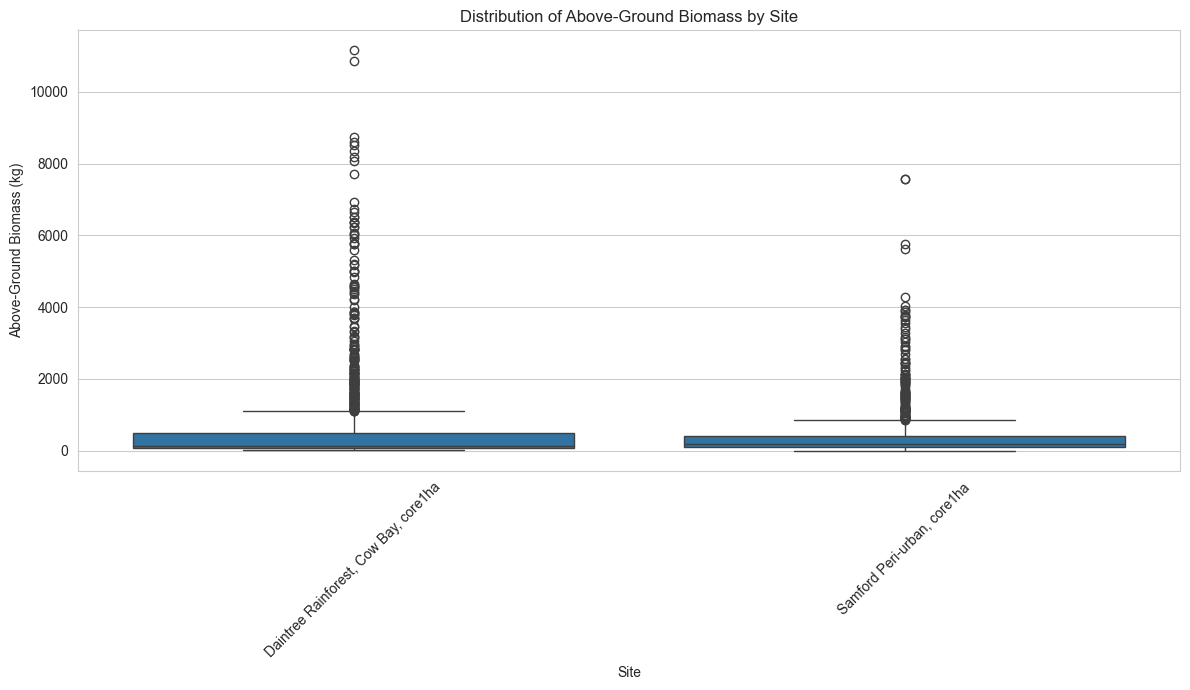

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.boxplot(x=data['parentSiteName'], y=data['aboveGroundBiomass_kilogram'])

plt.title('Distribution of Above-Ground Biomass by Site')
plt.ylabel('Above-Ground Biomass (kg)')
plt.xlabel('Site')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Box Plot Interpretation:

The box plot above provides a visual summary of the distribution of above-ground biomass across the various sites:

***Median (central line inside each box)***: This line represents the median value of the data, which is the value separating the higher half from the lower half. It provides a central point of reference for the dataset.

***Interquartile Range (IQR - height of the box)***: The height of the box represents the spread of the central 50% of the data values. The top edge (or the third quartile) indicates the 75th percentile, and the bottom edge (or the first quartile) represents the 25th percentile. The IQR provides insights into the data's dispersion and helps identify potential outliers.

***Outliers (points outside the whiskers)***: These are data points that fall outside the whiskers. Outliers could represent exceptionally large or small trees, or they could be the result of measurement errors.

***Whiskers***: These extend from the edges of the box to the maximum and minimum values within a specific range, typically 1.5 times the IQR. They give a visual representation of the spread of data outside the central 50%.

This visualisation offers a comparative understanding of the above-ground biomass distributions across sites. Comparing the spread, median, and presence of outliers can give insights into how biomass values differ across locations.



### Distribution of Above-Ground Biomass for Each Site

The histogram showcases the distribution of above-ground biomass for the different sites:

- **Daintree Rainforest Cow Bay (in blue)**: The distribution reveals a concentration of trees in the lower range of biomass values, with a tail indicating the presence of some trees with significantly higher biomass.
  
- **Samford Peri-Urban (in orange)**: The pattern is somewhat similar to Site A, but there might be variations in the spread and concentration of biomass values.

This visualisation helps in understanding the differences and similarities between the sites in terms of biomass distribution. 

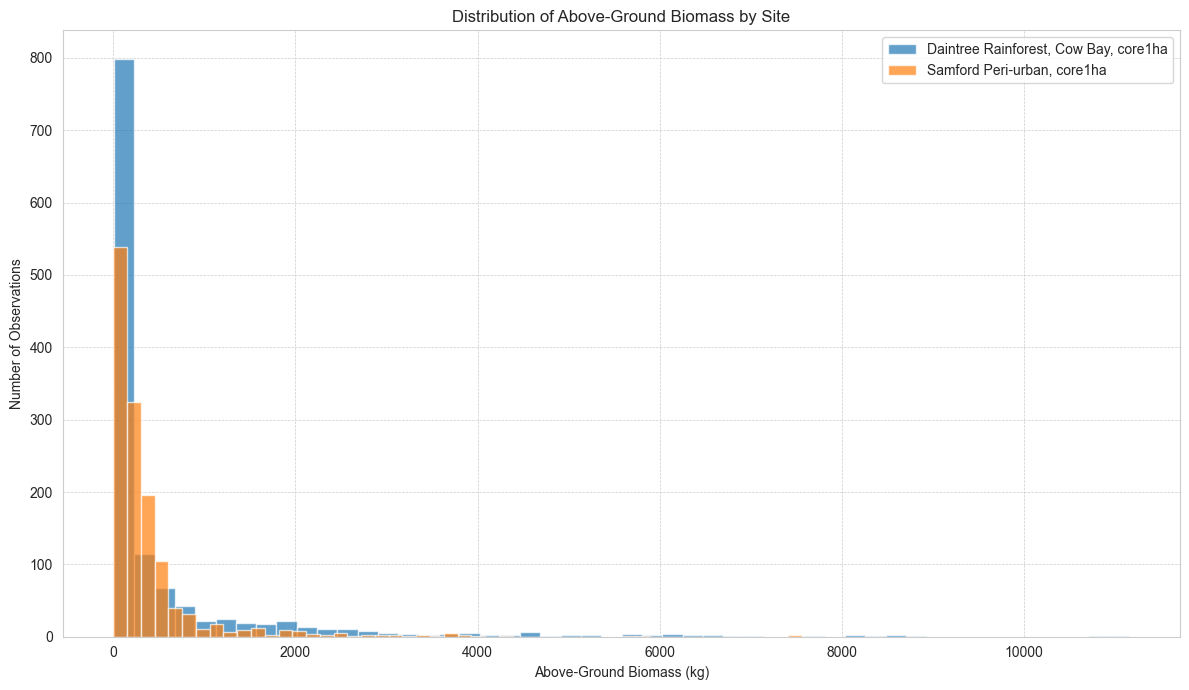

In [29]:
# Histogram for the distribution of above-ground biomass for each site
plt.figure(figsize=(12, 7))
for site in data['parentSiteName'].unique():
    subset = data[data['parentSiteName'] == site]
    plt.hist(subset['aboveGroundBiomass_kilogram'], bins=50, alpha=0.7, label=site)

plt.title('Distribution of Above-Ground Biomass by Site')
plt.xlabel('Above-Ground Biomass (kg)')
plt.ylabel('Number of Observations')
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Average Above-Ground Biomass by Species within Each Site

To further understand the contribution of different species to the above-ground biomass within each site, it's beneficial to look at the average biomass values by species. This can provide insights into which species are the most predominant in terms of biomass, potentially indicating their ecological significance or dominance within the ecosystem.


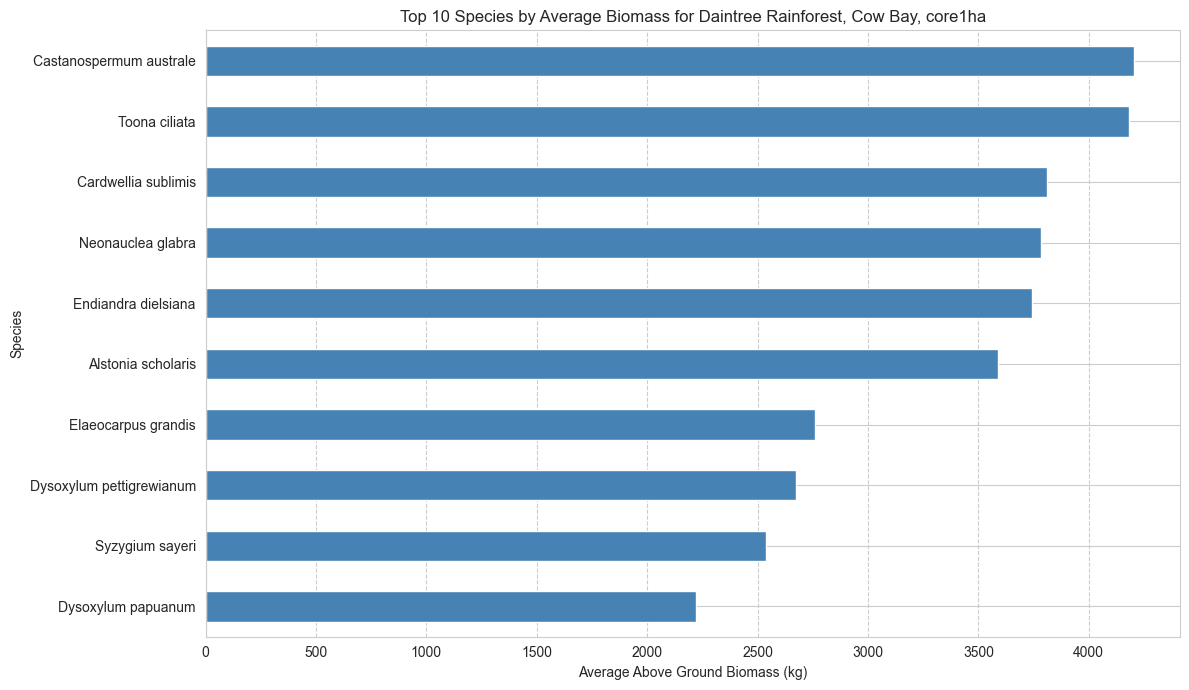

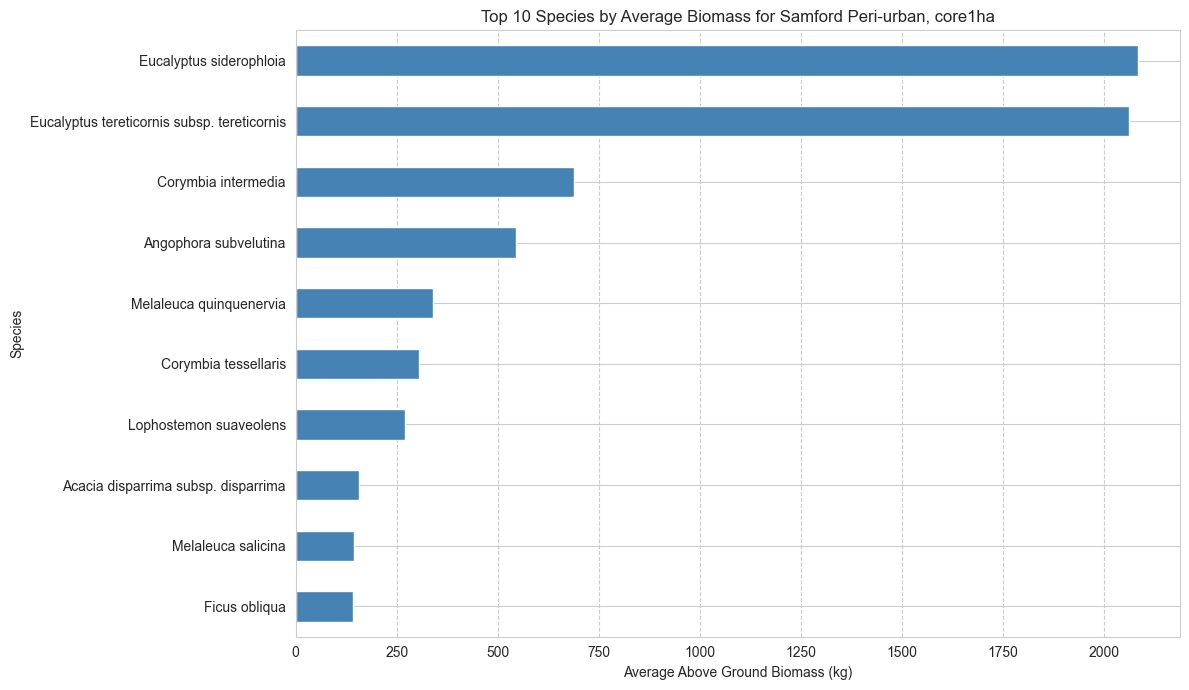

In [35]:
# Extracting the unique sites from the 'parentSiteName' column
unique_sites = data['parentSiteName'].unique()

# Creating the visualization for top 10 species by biomass for each site
for site in unique_sites:
    site_data = data[data['parentSiteName'] == site]
    top_species = site_data.groupby('scientificName')['aboveGroundBiomass_kilogram'].mean().nlargest(10)
    
    plt.figure(figsize=(12, 7))
    top_species.sort_values().plot(kind='barh', color='steelblue')
    plt.title(f"Top 10 Species by Average Biomass for {site}")
    plt.xlabel("Average Above Ground Biomass (kg)")
    plt.ylabel("Species")
    plt.grid(axis='x', linestyle='--')
    plt.tight_layout()
    plt.show()


### Final Remarks

We've come to the end of this guide on TERN's biomass dataset. In this tutorial, we provided a step-by-step approach to accessing the data directly from TERN's API, performing data checks, and conducting some preliminary analyses. We focused on understanding the distribution of above-ground biomass across different sites and species, and also explored the inherent relationships in the dataset.

It's worth noting that the dataset is dynamic, with potential updates and additions in the future. The methods and techniques shared here can serve as a foundation for further and more complex analyses tailored to specific research questions.

Thank you for engaging with this guide. We hope it serves as a useful starting point in your work with TERN's data.